# Australia Weather Prediction - Pyspark

##### Dataset Description

- Location - Name of the city from Australia.  
- MinTemp - The Minimum temperature during a particular day. (degree Celsius)  
- MaxTemp - The maximum temperature during a particular day. (degree Celsius)  
- Rainfall - Rainfall during a particular day. (millimeters)  
- Evaporation - Evaporation during a particular day. (millimeters)  
- Sunshine - Bright sunshine during a particular day. (hours)  
- WindGusDir - The direction of the strongest gust during a particular day. (16 compass points)  
- WindGuSpeed - Speed of strongest gust during a particular day. (kilometers per hour)  
- WindDir9am - The direction of the wind for 10 min prior to 9 am. (compass points)  
- WindDir3pm - The direction of the wind for 10 min prior to 3 pm. (compass points)  
- WindSpeed9am - Speed of the wind for 10 min prior to 9 am. (kilometers per hour)  
- WindSpeed3pm - Speed of the wind for 10 min prior to 3 pm. (kilometers per hour)  
- Humidity9am - The humidity of the wind at 9 am. (percent)  
- Humidity3pm - The humidity of the wind at 3 pm. (percent)  
- Pressure9am - Atmospheric pressure at 9 am. (hectopascals)  
- Pressure3pm - Atmospheric pressure at 3 pm. (hectopascals)  
- Cloud9am - Cloud-obscured portions of the sky at 9 am. (eighths)  
- Cloud3pm - Cloud-obscured portions of the sky at 3 pm. (eighths)  
- Temp9am - The temperature at 9 am. (degree Celsius)  
- Temp3pm - The temperature at 3 pm. (degree Celsius)  
- RainToday - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.  
- RainTomorrow - If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No).  

## Initializing Spark Session, Loading Dataset & Libraries

In [ ]:
#!pip install pyspark

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, count, when, rand, mean
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

sns.set_style('darkgrid')

In [2]:
spark = SparkSession.builder.appName("weather_prediction").getOrCreate()
spark.sparkContext.setLogLevel("ERROR") # Suppressing Warnings, allowing only Errors
spark

23/05/04 20:03:24 WARN Utils: Your hostname, slim-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/05/04 20:03:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/04 20:03:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = spark.read.format("csv").option("header","true").option("inferSchema", "true").load("Weather_Training_Data.csv")

In [4]:
df.show(5)

+------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|row ID|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|  Row0|  Albury|   13.4|   22.9|     0.6|       null|    null|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       8|    null|   16.9|   21.8|       No|           0|
|  Row1|  Albury|    7.4|   

In [5]:
print("Number of columns: ",len(df.columns))
print("Number of rows: ",df.count())

Number of columns:  23


Number of rows:  99516


In [6]:
display (df.printSchema(),len(df.columns))

df_summary = df.describe()
df_summary_transposed = df_summary.toPandas().transpose() # Convert to  Pandas DataFrame and transpose it

df_summary_transposed

root
 |-- row ID: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: double (nullable = true)
 |-- MaxTemp: double (nullable = true)
 |-- Rainfall: double (nullable = true)
 |-- Evaporation: double (nullable = true)
 |-- Sunshine: double (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: integer (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: integer (nullable = true)
 |-- WindSpeed3pm: integer (nullable = true)
 |-- Humidity9am: integer (nullable = true)
 |-- Humidity3pm: integer (nullable = true)
 |-- Pressure9am: double (nullable = true)
 |-- Pressure3pm: double (nullable = true)
 |-- Cloud9am: integer (nullable = true)
 |-- Cloud3pm: integer (nullable = true)
 |-- Temp9am: double (nullable = true)
 |-- Temp3pm: double (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: integer (nullable = true)



None

23

,0,1,2,3,4
summary,count,mean,stddev,min,max
row ID,99516,None,None,Row0,Row99999
Location,99516,None,None,Adelaide,Woomera
MinTemp,99073,12.176265985687314,6.390882290565232,-8.5,33.9
MaxTemp,99286,23.218513184134757,7.115072398372783,-4.1,48.1
Rainfall,98537,2.3530237372762692,8.487865726637184,0.0,371.0
Evaporation,56985,5.46131964552076,4.162490444622897,0.0,86.2
Sunshine,52199,7.615090327400976,3.783007646224733,0.0,14.5
WindGustDir,99516,None,None,E,WSW
WindGustSpeed,93036,39.97696590567092,13.58152350853846,6,135


## Data Cleaning

In [7]:
df = df.drop('row ID')

### Fixing Empty Values

In [8]:
# Calculate the number of null values in each column
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Calculate the total number of rows
total_rows = df.count()

# Calculate the percentage of null values in each column
null_percentages = null_counts.toPandas().transpose() / total_rows * 100

# Create a table that shows the total number of occurrences, the number of null variables, and the percentage between them
null_table = null_counts.toPandas().transpose()
null_table["Total Occurrences"] = total_rows
null_table.columns = ["Number of Null Values", "Total Occurrences"]
null_table["Percentage of Null Values"] = null_percentages.round(2)

null_table = null_table[["Total Occurrences", "Number of Null Values", "Percentage of Null Values"]]

null_table
#Only for numerical values

,Total Occurrences,Number of Null Values,Percentage of Null Values
Location,99516,0,0.00
MinTemp,99516,443,0.45
MaxTemp,99516,230,0.23
Rainfall,99516,979,0.98
Evaporation,99516,42531,42.74
Sunshine,99516,47317,47.55
WindGustDir,99516,0,0.00
WindGustSpeed,99516,6480,6.51
WindDir9am,99516,0,0.00
WindDir3pm,99516,0,0.00


In [9]:
num_cols = [c for c, dtype in df.dtypes if dtype in ["double", "int","float"]]
mean_values = df.select([mean(c).alias(c) for c in num_cols]).first().asDict() # Calculate mean of each column
for col_name in num_cols:
    df = df.fillna(mean_values[col_name], subset=[col_name]) # Fill the null values with mean 


In [10]:
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]) # Calculate null values in each column

null_counts.show()

+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|       0|      0|      0|       0|          0|       0|          0|            0|         0|         0|           0|           0|          0|          0|          0|          0|       0|       0|      0|      0|        0|           0|
+--------+-------+-------+--------+-----------+--------+

In [11]:
non_numeric_cols = [c for c, dtype in df.dtypes if dtype not in ["double", "int","float"]]

for col_name in non_numeric_cols:
    df.groupBy(col(col_name)).count().show() # Display the distribution of values for each non-numerical column

+-------------+-----+
|     Location|count|
+-------------+-----+
|NorfolkIsland| 2038|
|      Bendigo| 2110|
|     Canberra| 2393|
|        Cobar| 2090|
|SydneyAirport| 2100|
|   Wollongong| 2090|
|  Williamtown| 1816|
|        Moree| 2020|
|       Sydney| 2361|
|         Sale| 2093|
|BadgerysCreek| 2041|
|  Tuggeranong| 2099|
|     Ballarat| 2122|
|       Albury| 2142|
|   WaggaWagga| 2068|
| CoffsHarbour| 2066|
|      Penrith| 2059|
|    NorahHead| 2028|
|  MountGinini| 2025|
|    Newcastle| 2096|
+-------------+-----+
only showing top 20 rows

+-----------+-----+
|WindGustDir|count|
+-----------+-----+
|        SSE| 6329|
|         SW| 6233|
|         NW| 5599|
|         NA| 6521|
|          E| 6341|
|        WSW| 6164|
|        ENE| 5558|
|         NE| 4956|
|        NNW| 4589|
|          N| 6323|
|        SSW| 6023|
|          W| 6843|
|          S| 6228|
|         SE| 6475|
|        WNW| 5664|
|        NNE| 4569|
|        ESE| 5101|
+-----------+-----+

+----------+-----+
|WindD

+----------+-----+
|WindDir3pm|count|
+----------+-----+
|       SSE| 6386|
|        NW| 5917|
|        SW| 6451|
|        NA| 2648|
|         E| 5839|
|       WSW| 6640|
|       ENE| 5413|
|        NE| 5710|
|       NNW| 5437|
|         N| 6065|
|       SSW| 5576|
|         W| 6897|
|         S| 6653|
|        SE| 7410|
|       WNW| 6063|
|       NNE| 4561|
|       ESE| 5850|
+----------+-----+

+---------+-----+
|RainToday|count|
+---------+-----+
|       NA|  979|
|       No|76481|
|      Yes|22056|
+---------+-----+



In [12]:
for col_name in non_numeric_cols:
    count_df = df.filter(col(col_name) == "NA").agg(count("*").alias("count")) # Calculate NA occurances
    total_count = df.count()
    proportion = count_df.collect()[0]["count"] / total_count * 100 # Calculate the proportion
    print("Proportion of Empty Values in column '{}': {:.2f}%".format(col_name, proportion))


Proportion of Empty Values in column 'Location': 0.00%
Proportion of Empty Values in column 'WindGustDir': 6.55%
Proportion of Empty Values in column 'WindDir9am': 7.04%
Proportion of Empty Values in column 'WindDir3pm': 2.66%
Proportion of Empty Values in column 'RainToday': 0.98%


In [13]:
na_cols = ['WindGustDir','WindDir9am','WindDir3pm'] # List of columns with NA values to fill
values = ['W', 'NNW', 'ENE', 'SSE', 'S', 'NE', 'SSW', 'N', 'WSW', 'SE', 'ESE', 'E', 'NW', 'NNE', 'SW', 'WNW'] # List of Values to choose with

df = df.replace('NA', random.choice(values),subset=na_cols) # Replace with random values
df = df.filter(col("RainToday") != "NA") # Drop entire rows when NA
df.show(10)

+--------+-------+-------+--------+----------------+-----------------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|Location|MinTemp|MaxTemp|Rainfall|     Evaporation|         Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+--------+-------+-------+--------+----------------+-----------------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|  Albury|   13.4|   22.9|     0.6|5.46131964552076|7.615090327400976|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       8|       4|   16.9|   21.8|       No|           0|


In [14]:
for col_name in non_numeric_cols:
    count_df = df.filter(col(col_name) == "NA").agg(count("*").alias("count")) # Calculate NA occurances
    total_count = df.count()
    proportion = count_df.collect()[0]["count"] / total_count * 100 # Calculate the proportion
    print("Proportion of Empty Values in column '{}': {:.2f}%".format(col_name, proportion))


Proportion of Empty Values in column 'Location': 0.00%
Proportion of Empty Values in column 'WindGustDir': 0.00%
Proportion of Empty Values in column 'WindDir9am': 0.00%
Proportion of Empty Values in column 'WindDir3pm': 0.00%
Proportion of Empty Values in column 'RainToday': 0.00%


### Fixing Column Types

In [15]:
df = df.withColumn("RainToday", when(col("RainToday") == "Yes", 1).otherwise(0)) # Change from string to boolean

In [16]:
df.show()

+--------+-------+-------+--------+----------------+-----------------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|Location|MinTemp|MaxTemp|Rainfall|     Evaporation|         Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+--------+-------+-------+--------+----------------+-----------------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|  Albury|   13.4|   22.9|     0.6|5.46131964552076|7.615090327400976|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       8|       4|   16.9|   21.8|        0|           0|


In [17]:
display (df.printSchema(),len(df.columns))

root
 |-- Location: string (nullable = true)
 |-- MinTemp: double (nullable = false)
 |-- MaxTemp: double (nullable = false)
 |-- Rainfall: double (nullable = false)
 |-- Evaporation: double (nullable = false)
 |-- Sunshine: double (nullable = false)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: integer (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: integer (nullable = true)
 |-- WindSpeed3pm: integer (nullable = true)
 |-- Humidity9am: integer (nullable = true)
 |-- Humidity3pm: integer (nullable = true)
 |-- Pressure9am: double (nullable = false)
 |-- Pressure3pm: double (nullable = false)
 |-- Cloud9am: integer (nullable = true)
 |-- Cloud3pm: integer (nullable = true)
 |-- Temp9am: double (nullable = false)
 |-- Temp3pm: double (nullable = false)
 |-- RainToday: integer (nullable = false)
 |-- RainTomorrow: integer (nullable = true)



None

22

In [18]:
# Cast to Boolean from Integer
df = df.withColumn("RainToday", df["RainToday"].cast("boolean"))
df = df.withColumn("RainTomorrow", df["RainTomorrow"].cast("boolean"))

In [19]:
display (df.printSchema(),len(df.columns))

root
 |-- Location: string (nullable = true)
 |-- MinTemp: double (nullable = false)
 |-- MaxTemp: double (nullable = false)
 |-- Rainfall: double (nullable = false)
 |-- Evaporation: double (nullable = false)
 |-- Sunshine: double (nullable = false)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: integer (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: integer (nullable = true)
 |-- WindSpeed3pm: integer (nullable = true)
 |-- Humidity9am: integer (nullable = true)
 |-- Humidity3pm: integer (nullable = true)
 |-- Pressure9am: double (nullable = false)
 |-- Pressure3pm: double (nullable = false)
 |-- Cloud9am: integer (nullable = true)
 |-- Cloud3pm: integer (nullable = true)
 |-- Temp9am: double (nullable = false)
 |-- Temp3pm: double (nullable = false)
 |-- RainToday: boolean (nullable = false)
 |-- RainTomorrow: boolean (nullable = true)



None

22

## Data Understanding & Analytics

### Transformation from Spark Dataframe to Pandas Dataframe

In [20]:
df_pandas= df.toPandas()
df_pandas

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.46132,7.61509,W,44,W,WNW,...,71,22,1007.7,1007.1,8,4,16.9,21.8,False,False
1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44,NNW,WSW,...,44,25,1010.6,1007.8,4,4,17.2,24.3,False,False
2,Albury,17.5,32.3,1.0,5.46132,7.61509,W,41,ENE,NW,...,82,33,1010.8,1006.0,7,8,17.8,29.7,False,False
3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56,W,W,...,55,23,1009.2,1005.4,4,4,20.6,28.9,False,False
4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35,SSE,W,...,48,19,1013.4,1010.1,4,4,16.3,25.5,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98532,Uluru,8.0,20.7,0.0,5.46132,7.61509,ESE,41,SE,E,...,56,32,1028.1,1024.3,4,7,11.6,20.0,False,False
98533,Uluru,3.5,21.8,0.0,5.46132,7.61509,E,31,ESE,E,...,59,27,1024.7,1021.2,4,4,9.4,20.9,False,False
98534,Uluru,2.8,23.4,0.0,5.46132,7.61509,E,31,SE,ENE,...,51,24,1024.6,1020.3,4,4,10.1,22.4,False,False
98535,Uluru,3.6,25.3,0.0,5.46132,7.61509,NNW,22,SE,N,...,56,21,1023.5,1019.1,4,4,10.9,24.5,False,False


In [21]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98537 entries, 0 to 98536
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       98537 non-null  object 
 1   MinTemp        98537 non-null  float64
 2   MaxTemp        98537 non-null  float64
 3   Rainfall       98537 non-null  float64
 4   Evaporation    98537 non-null  float64
 5   Sunshine       98537 non-null  float64
 6   WindGustDir    98537 non-null  object 
 7   WindGustSpeed  98537 non-null  int32  
 8   WindDir9am     98537 non-null  object 
 9   WindDir3pm     98537 non-null  object 
 10  WindSpeed9am   98537 non-null  int32  
 11  WindSpeed3pm   98537 non-null  int32  
 12  Humidity9am    98537 non-null  int32  
 13  Humidity3pm    98537 non-null  int32  
 14  Pressure9am    98537 non-null  float64
 15  Pressure3pm    98537 non-null  float64
 16  Cloud9am       98537 non-null  int32  
 17  Cloud3pm       98537 non-null  int32  
 18  Temp9a

### Rain Today vs Rain Tomorrow

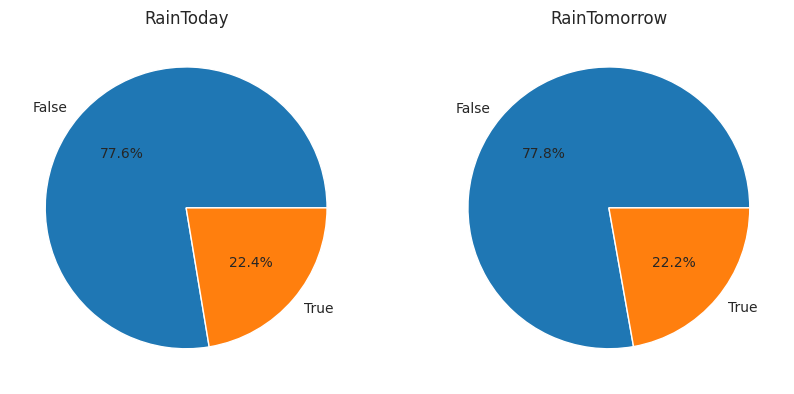

In [22]:
# Get counts of unique values in RainToday column
counts_rain_today = df_pandas['RainToday'].value_counts()

# Get counts of unique values in RainTomorrow column
counts_rain_tomorrow = df_pandas['RainTomorrow'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(counts_rain_today.values, labels=counts_rain_today.index, autopct='%1.1f%%')
axs[0].set_title("RainToday")

axs[1].pie(counts_rain_tomorrow.values, labels=counts_rain_tomorrow.index, autopct='%1.1f%%')
axs[1].set_title("RainTomorrow")

plt.show()

RainToday and RainTomorrow features do exhibit similar patterns. Is there a significant correlation between them?

Correlation between raintomorrow and raintoday: 0.31175089847173465


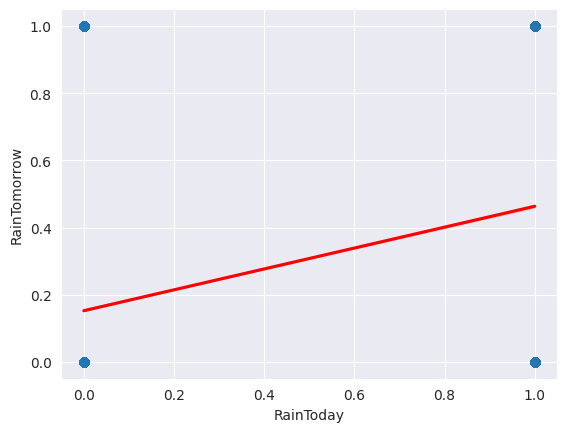

In [23]:
sns.regplot(x='RainToday', y='RainTomorrow', data=df_pandas, line_kws={'color': 'red'})
correlation = df_pandas['RainTomorrow'].corr(df_pandas['RainToday'])
print('Correlation between raintomorrow and raintoday:', correlation)

Based on the correlation coefficient calculation, there is only a weak correlation between RainToday and RainTomorrow features, indicating that they do not exhibit a strong relationship.

### Min vs Max Temperatures

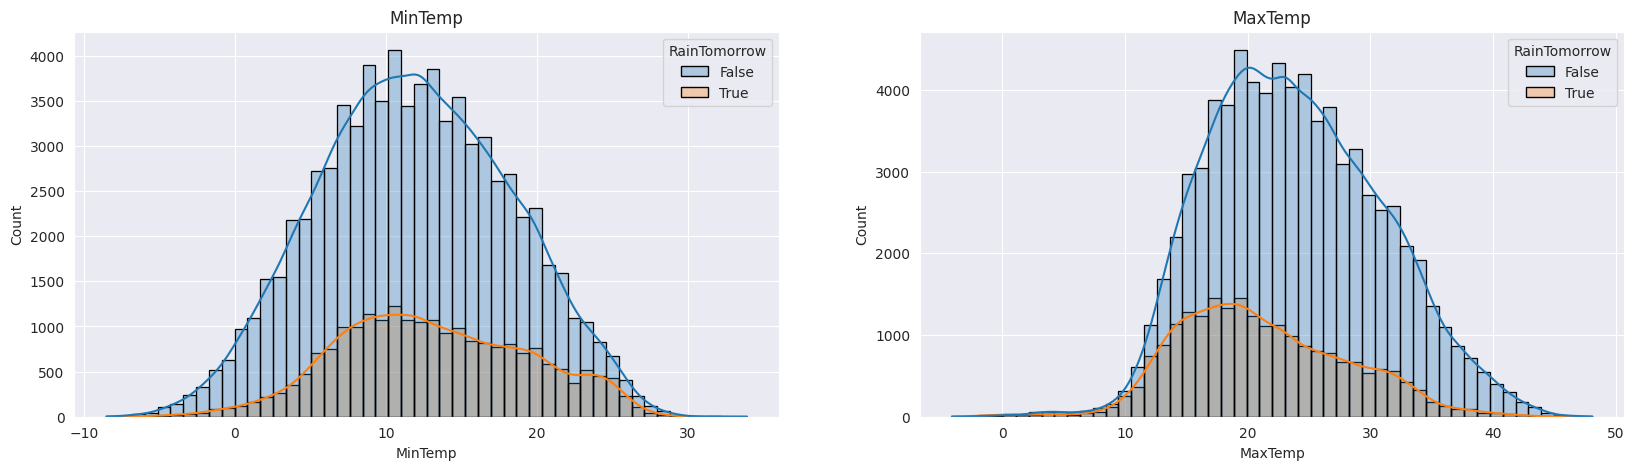

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=df_pandas, x='MinTemp', ax=axs[0], bins=50, kde=True, hue='RainTomorrow' ,edgecolor='black',alpha=0.3)
axs[0].set_title('MinTemp')
sns.histplot(data=df_pandas, x='MaxTemp', ax=axs[1], bins=50,kde=True,edgecolor='black',hue='RainTomorrow' ,alpha=0.3)
axs[1].set_title('MaxTemp')
plt.show()

Based on the comparison of the KDE lines for RainTomorrow=False and RainTomorrow=True in both plots on the chart, it appears that temperatures have little to no influence on whether it will rain tomorrow. The similarity in the lines suggests that temperature is not a significant factor in predicting rain tomorrow.

Based on the distribution of Minimum and Maximum Temperatures, it appears that the majority of Minimum Temperatures fall within a range of 8-12° Celsius, while the majority of Maximum Temperatures fall within a range of 18-22° Celsius. These ranges represent the most common values for each temperature variable, as evidenced by their peaks in the distribution graphs.

In [25]:
correlation = df_pandas['RainTomorrow'].corr(df_pandas['MinTemp'])
print('Correlation between RainTomorrow and MinTemp:', correlation)
correlation = df_pandas['RainTomorrow'].corr(df_pandas['MaxTemp'])
print('Correlation between RainTomorrow and MaxTemp:', correlation)

Correlation between RainTomorrow and MinTemp: 0.08479583945039111
Correlation between RainTomorrow and MaxTemp: -0.15949000840553515


### Temperature Variation

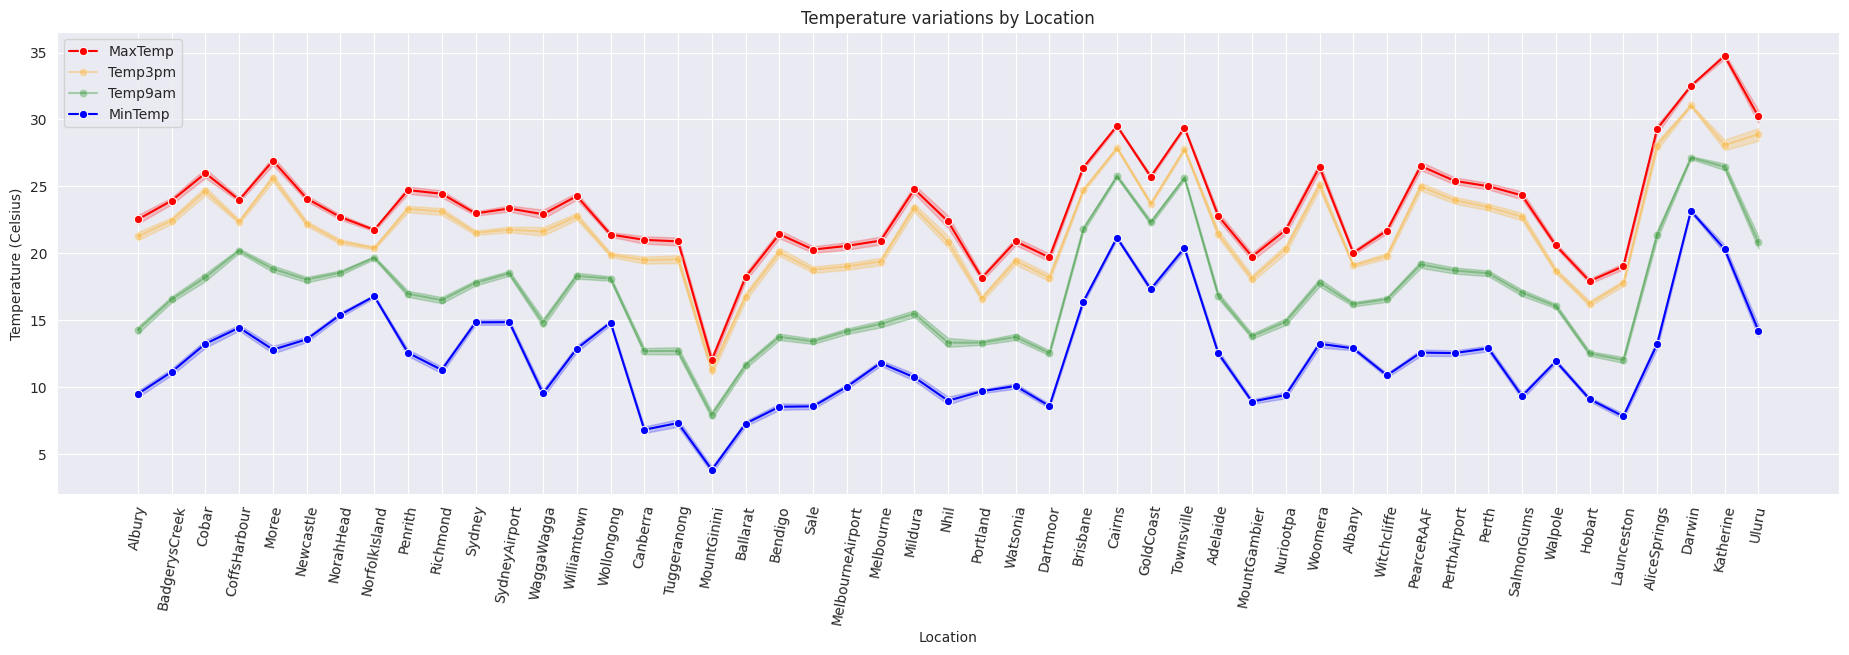

In [26]:
fig, ax = plt.subplots(figsize=(23,6))
sns.lineplot(x="Location", y="MaxTemp",  data=df_pandas, ax=ax,color='red',marker='o',label='MaxTemp')
sns.lineplot(x="Location", y="Temp3pm", data=df_pandas, ax=ax,color='orange',marker='o',label='Temp3pm',alpha=0.3)
sns.lineplot(x="Location", y="Temp9am",  data=df_pandas, ax=ax,color='green',marker='o',label='Temp9am',alpha=0.3)
sns.lineplot(x="Location", y="MinTemp", data=df_pandas, ax=ax,color='blue',marker='o',label='MinTemp')
ax.set(title="Temperature variations by Location")
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=80)
plt.show()

Based on the temperature data, Australia generally experiences stable weather conditions, with only a few extreme locations such as 'MountGinini', which tends to have some of the coldest temperatures, and 'Katherine', which tends to have some of the hottest temperatures.

Additionally, there is a strong correlation between the maximum temperatures of the day and the temperatures at 3 pm. This suggests that the highest temperatures tend to occur in the late afternoon.

### Wind Speed Variation

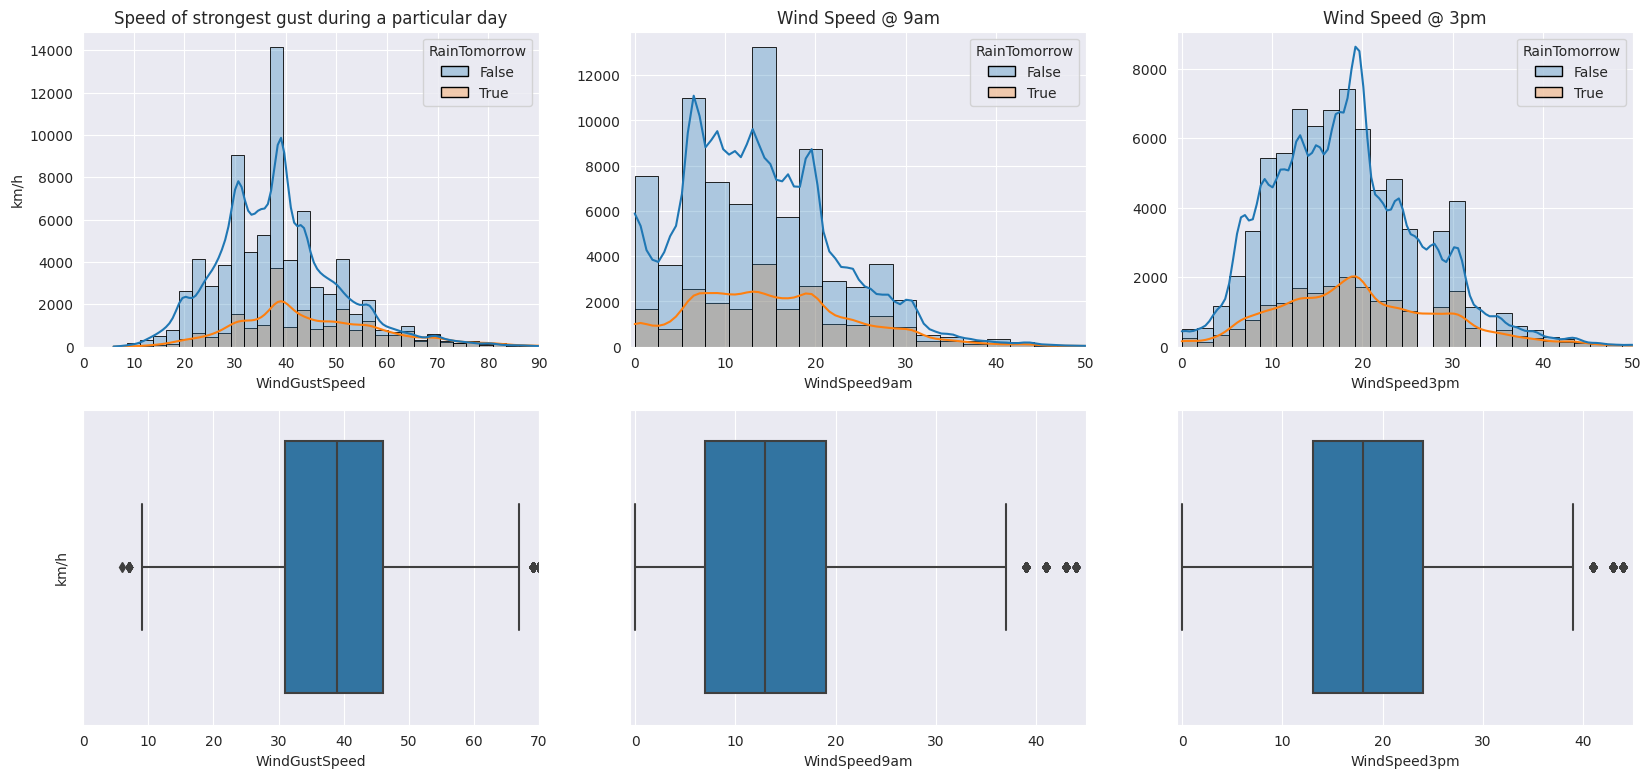

In [27]:
fig, axs = plt.subplots(2, 3, figsize=(20, 9))

sns.histplot(data=df_pandas, x='WindGustSpeed', ax=axs[0, 0], bins=50, kde=True, hue='RainTomorrow', edgecolor='black', alpha=0.3)
axs[0, 0].set_title('Speed of strongest gust during a particular day')
axs[0, 0].set_ylabel('km/h')
axs[0, 0].set_xlim([0, 90])

sns.histplot(data=df_pandas, x='WindSpeed9am', ax=axs[0, 1], bins=50, kde=True, hue='RainTomorrow', edgecolor='black', alpha=0.3)
axs[0, 1].set_title('Wind Speed @ 9am')
axs[0, 1].set_ylabel('')
axs[0, 1].set_xlim([-0.5, 50])

sns.histplot(data=df_pandas, x='WindSpeed3pm', ax=axs[0, 2], bins=50, kde=True, hue='RainTomorrow', edgecolor='black', alpha=0.3)
axs[0, 2].set_title('Wind Speed @ 3pm')
axs[0, 2].set_xlim([-0.5, 50])
axs[0, 2].set_ylabel('')

sns.boxplot(x=df_pandas['WindGustSpeed'],ax=axs[1,0])
axs[1, 0].set_ylabel('km/h')
axs[1, 0].set_xlim([0, 70])

sns.boxplot(x=df_pandas['WindSpeed9am'],ax=axs[1,1])
axs[1, 1].set_ylabel('')
axs[1, 1].set_xlim([-0.5, 45])

sns.boxplot(x=df_pandas['WindSpeed3pm'],ax=axs[1,2])
axs[1, 2].set_ylabel('')
axs[1, 2].set_xlim([-0.5, 45])

plt.show()

Analysis of the WindGust, WindSpeed9am, and WindSpeed3pm data indicates that WindGust typically ranges between 30 and 45 km/h, with a maximum frequency at 40 km/h. WindSpeed9am has a narrower range of 7 to 20 km/h, with a maximum frequency at 15 km/h. WindSpeed3pm falls between 13 and 24 km/h, with a maximum frequency at 20 km/h.

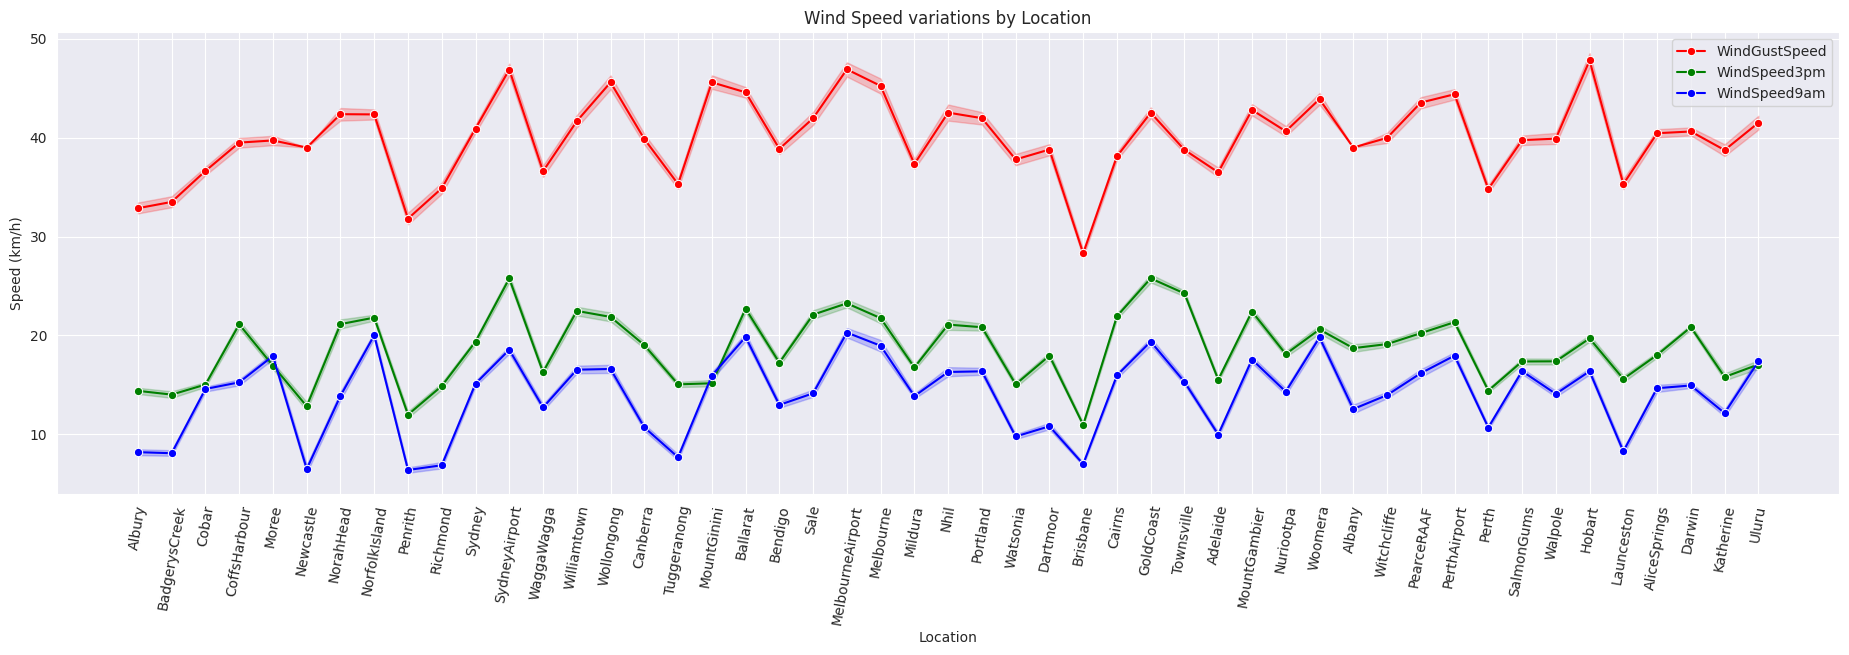

In [28]:
fig, ax = plt.subplots(figsize=(23,6))
sns.lineplot(x="Location", y="WindGustSpeed",  data=df_pandas, ax=ax,color='red',marker='o',label='WindGustSpeed')
sns.lineplot(x="Location", y="WindSpeed3pm", data=df_pandas, ax=ax,color='green',marker='o',label='WindSpeed3pm')
sns.lineplot(x="Location", y="WindSpeed9am",  data=df_pandas, ax=ax,color='blue',marker='o',label='WindSpeed9am')
ax.set(title="Wind Speed variations by Location")
plt.ylabel('Speed (km/h)')
plt.xticks(rotation=80)
plt.show()

### Pressure Variation

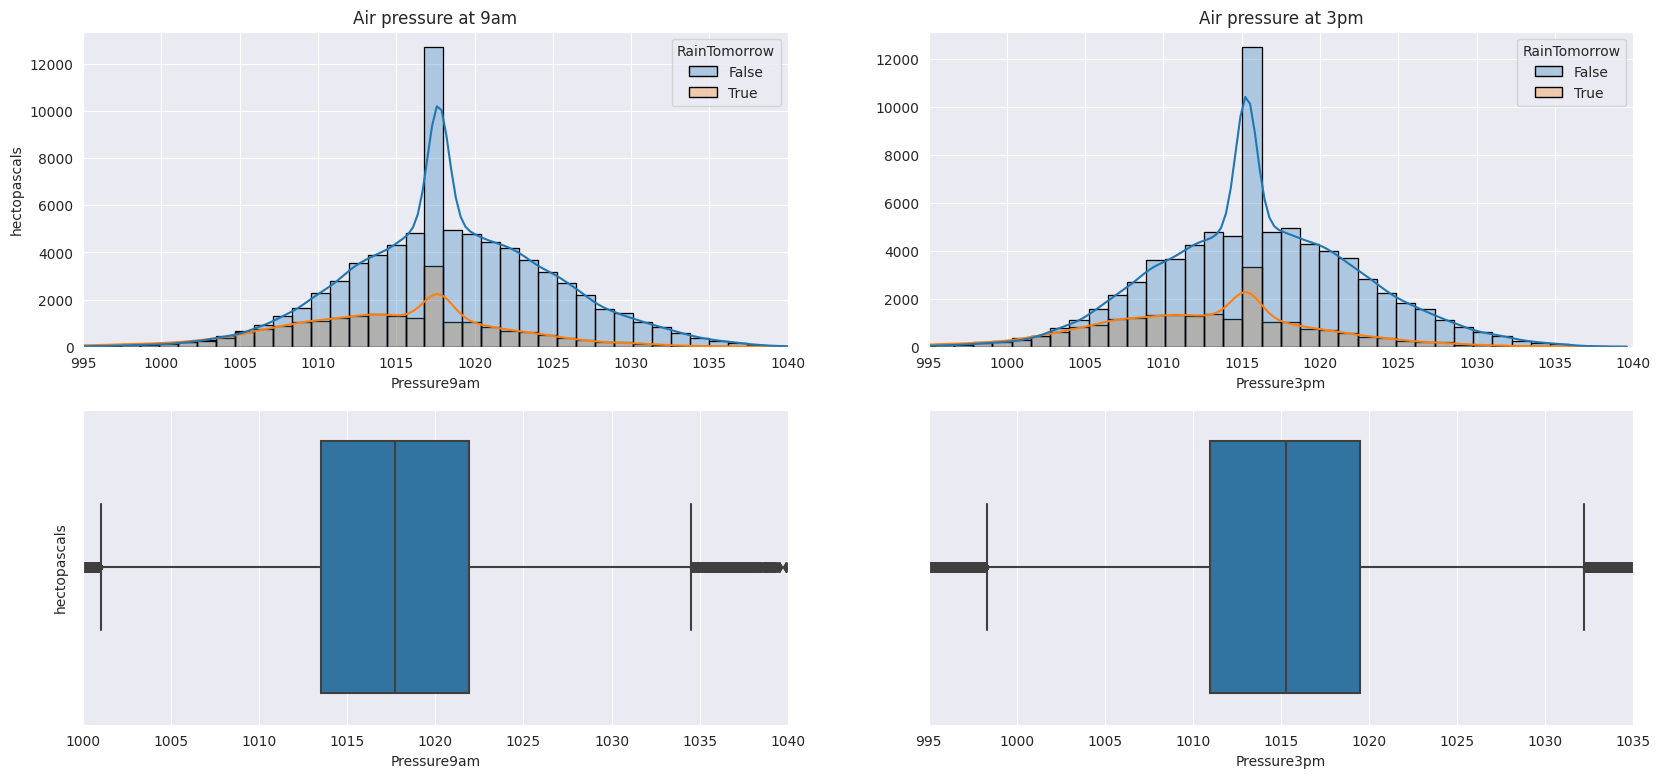

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(20, 9))

sns.histplot(data=df_pandas, x='Pressure9am', ax=axs[0, 0], bins=50, kde=True, hue='RainTomorrow', edgecolor='black', alpha=0.3)
axs[0, 0].set_title('Air pressure at 9am')
axs[0, 0].set_ylabel('hectopascals')
axs[0, 0].set_xlim([995, 1040])

sns.histplot(data=df_pandas, x='Pressure3pm', ax=axs[0, 1], bins=50, kde=True, hue='RainTomorrow', edgecolor='black', alpha=0.3)
axs[0, 1].set_title('Air pressure at 3pm')
axs[0, 1].set_ylabel('')
axs[0, 1].set_xlim([995, 1040])

sns.boxplot(x=df_pandas['Pressure9am'], ax=axs[1, 0])
axs[1, 0].set_ylabel('hectopascals')
axs[1, 0].set_xlim([1000, 1040])

sns.boxplot(x=df_pandas['Pressure3pm'], ax=axs[1, 1])
axs[1, 1].set_ylabel('')
axs[1, 1].set_xlim([995, 1035])

plt.show()


Analysis of the Air Pressure data indicates that there is a relatively small difference between the Air Pressure readings at 9am and 3pm. On average, Air Pressure at 9am is around 1018 Hectopascals, and it drops slightly to around 1015 Hectopascals by 3pm. This consistency in Air Pressure suggests that there are no significant atmospheric disturbances occurring during the day that could cause sudden changes in pressure.

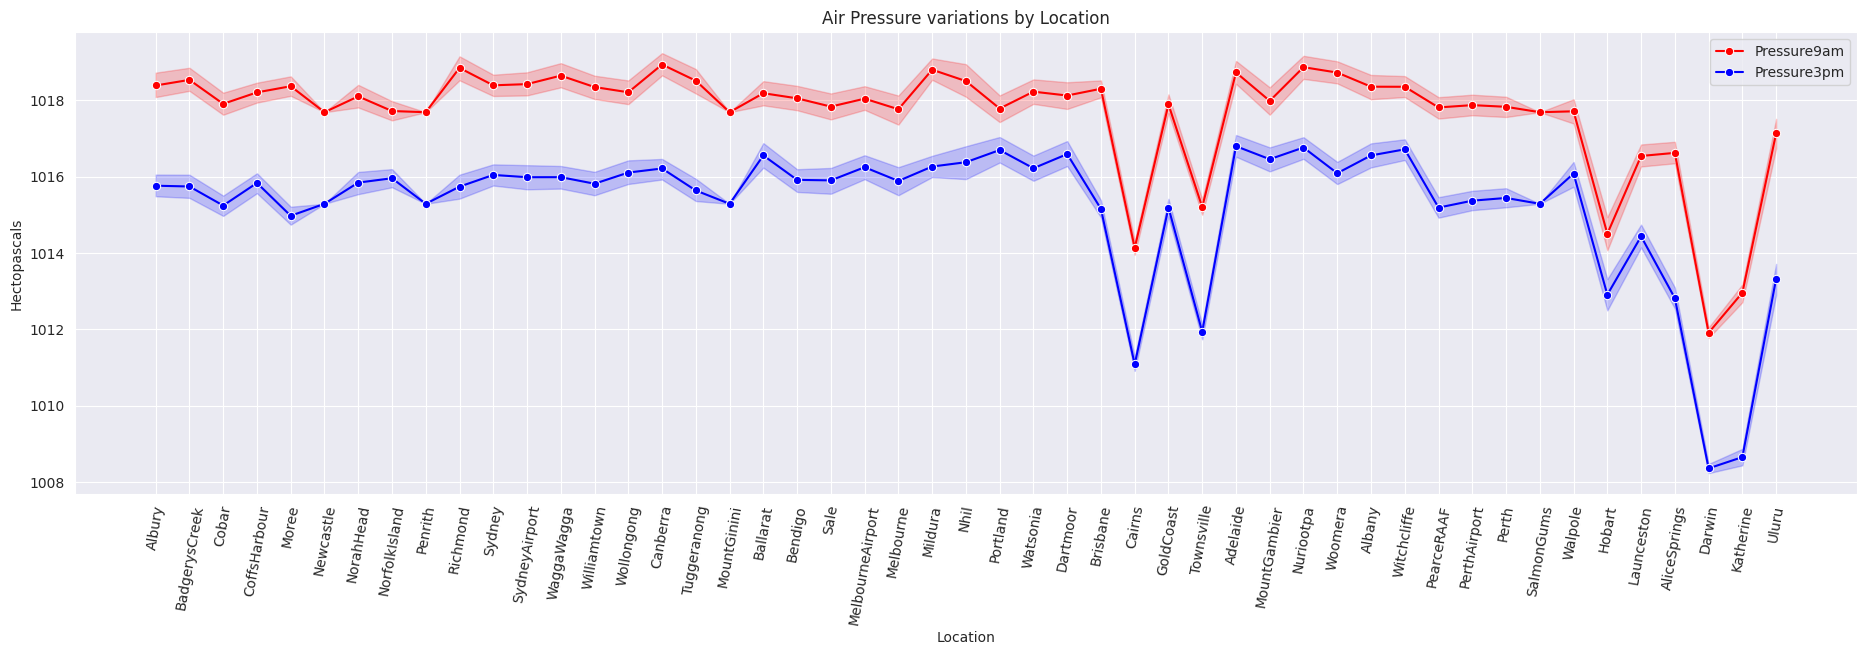

In [30]:
fig, ax = plt.subplots(figsize=(23,6))
sns.lineplot(x="Location", y="Pressure9am",  data=df_pandas, ax=ax,color='red',marker='o',label='Pressure9am')
sns.lineplot(x="Location", y="Pressure3pm",  data=df_pandas, ax=ax,color='blue',marker='o',label='Pressure3pm')
ax.set(title="Air Pressure variations by Location")
plt.ylabel('Hectopascals')
plt.xticks(rotation=80)
plt.show()

### Humidity Variation

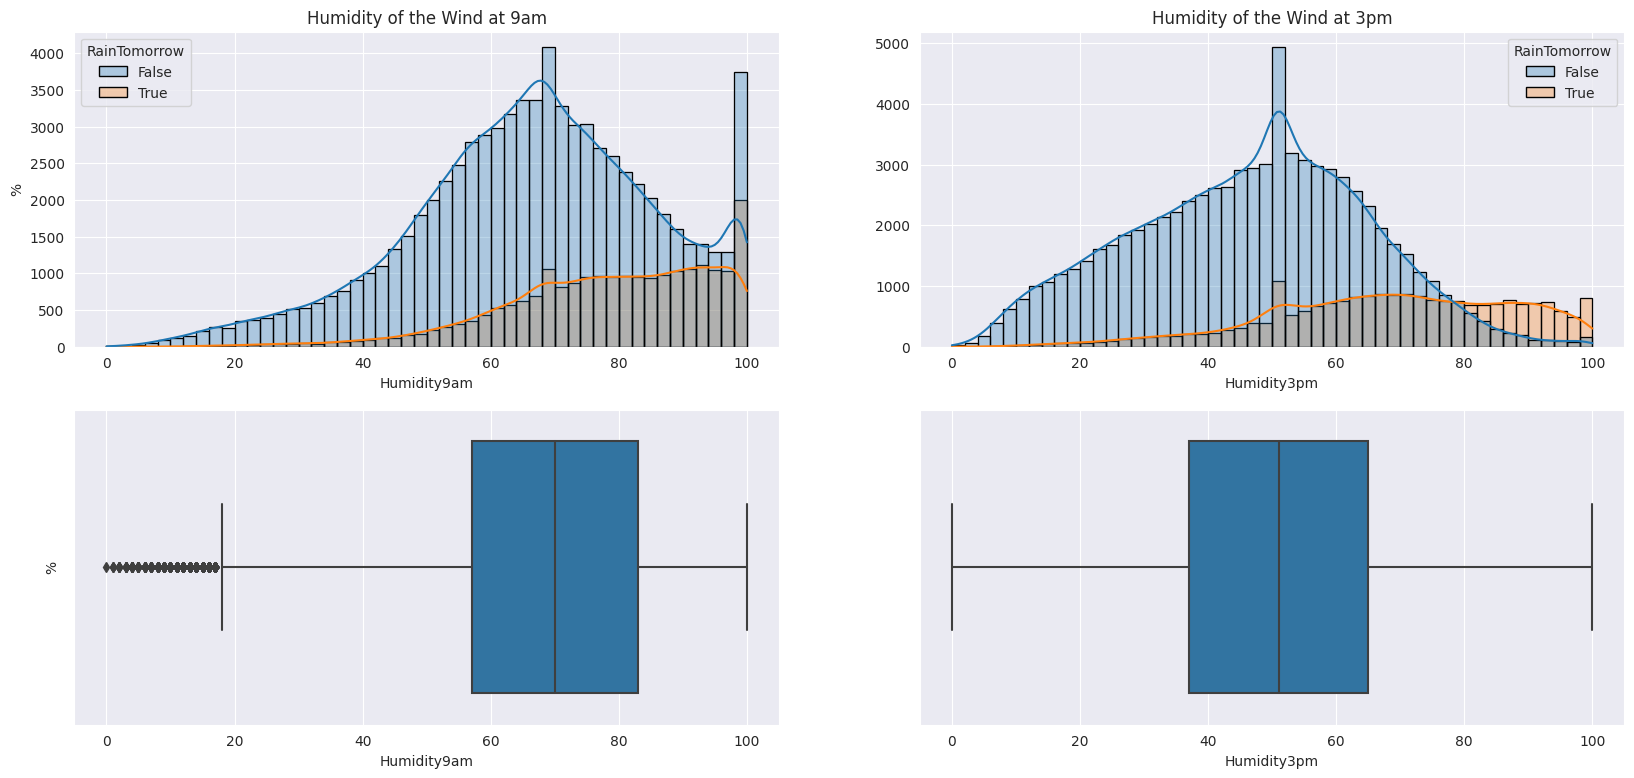

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(20, 9))

sns.histplot(data=df_pandas, x='Humidity9am', ax=axs[0, 0], bins=50, kde=True, hue='RainTomorrow', edgecolor='black', alpha=0.3)
axs[0, 0].set_title('Humidity of the Wind at 9am')
axs[0, 0].set_ylabel('%')

sns.histplot(data=df_pandas, x='Humidity3pm', ax=axs[0, 1], bins=50, kde=True, hue='RainTomorrow', edgecolor='black', alpha=0.3)
axs[0, 1].set_title('Humidity of the Wind at 3pm')
axs[0, 1].set_ylabel('')

sns.boxplot(x=df_pandas['Humidity9am'], ax=axs[1, 0])
axs[1, 0].set_ylabel('%')

sns.boxplot(x=df_pandas['Humidity3pm'], ax=axs[1, 1])
axs[1, 1].set_ylabel('')

plt.show()

Analysis of the data suggests a strong correlation between the humidity levels at both 9am and 3pm and the chance of rain tomorrow. Specifically, higher humidity levels at these times are associated with an increased likelihood of rain the following day.

This correlation highlights the important role that humidity plays in predicting weather conditions. As humidity increases, the air becomes more saturated with moisture, increasing the likelihood of precipitation. By closely monitoring humidity levels, particularly at 9am and 3pm, weather forecasters can better predict the likelihood and intensity of rain in the coming days.

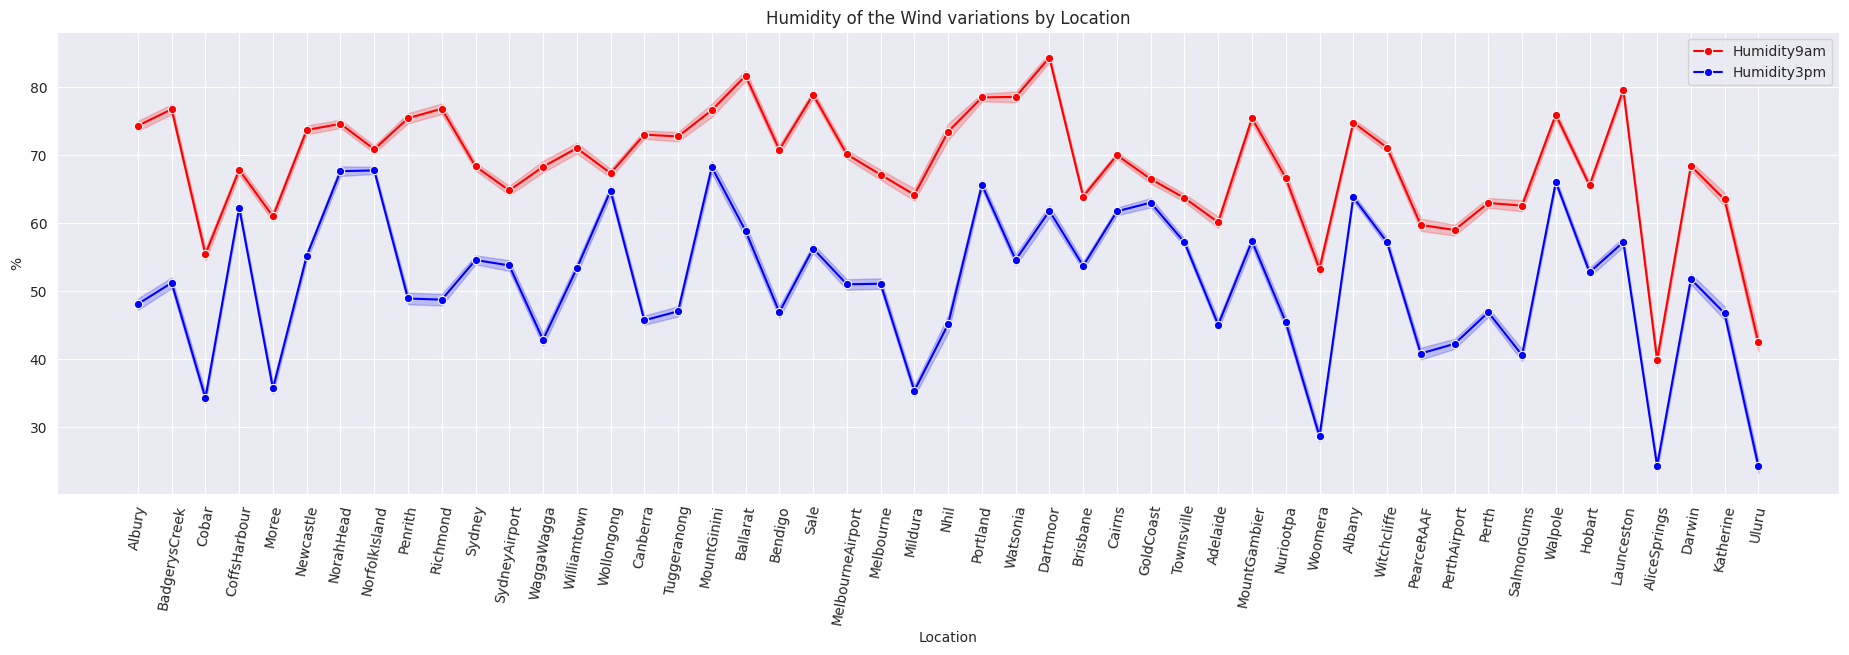

In [32]:
fig, ax = plt.subplots(figsize=(23,6))
sns.lineplot(x="Location", y="Humidity9am",  data=df_pandas, ax=ax,color='red',marker='o',label='Humidity9am')
sns.lineplot(x="Location", y="Humidity3pm",  data=df_pandas, ax=ax,color='blue',marker='o',label='Humidity3pm')
ax.set(title="Humidity of the Wind variations by Location")
plt.ylabel('%')
plt.xticks(rotation=80)
plt.show()

### Rainfall Variation

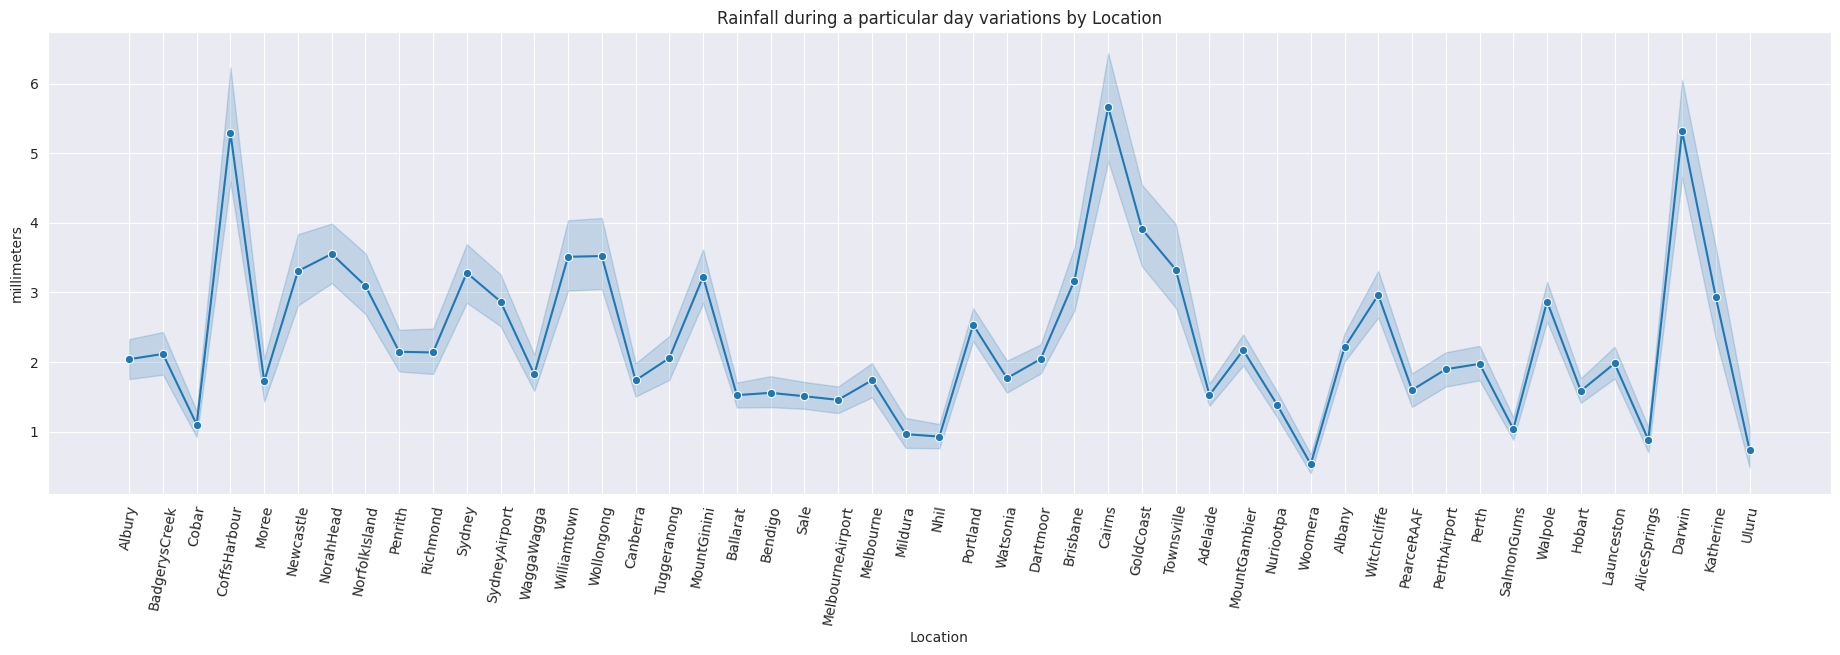

In [33]:
fig, ax = plt.subplots(figsize=(23,6))
sns.lineplot(x="Location", y="Rainfall",  data=df_pandas, ax=ax,marker='o')
ax.set(title="Rainfall during a particular day variations by Location")
plt.ylabel('millimeters')
plt.xticks(rotation=80)
plt.show()

Analysis of the rainfall data reveals that cities such as 'CoffsHarbour', 'Cairns', and 'Darwin' experience significantly more rainfall than others in the dataset. These cities are located in regions with high levels of precipitation and are known for their lush, tropical climates.

## Machine Learning

### Correlation Between Numerical Columns

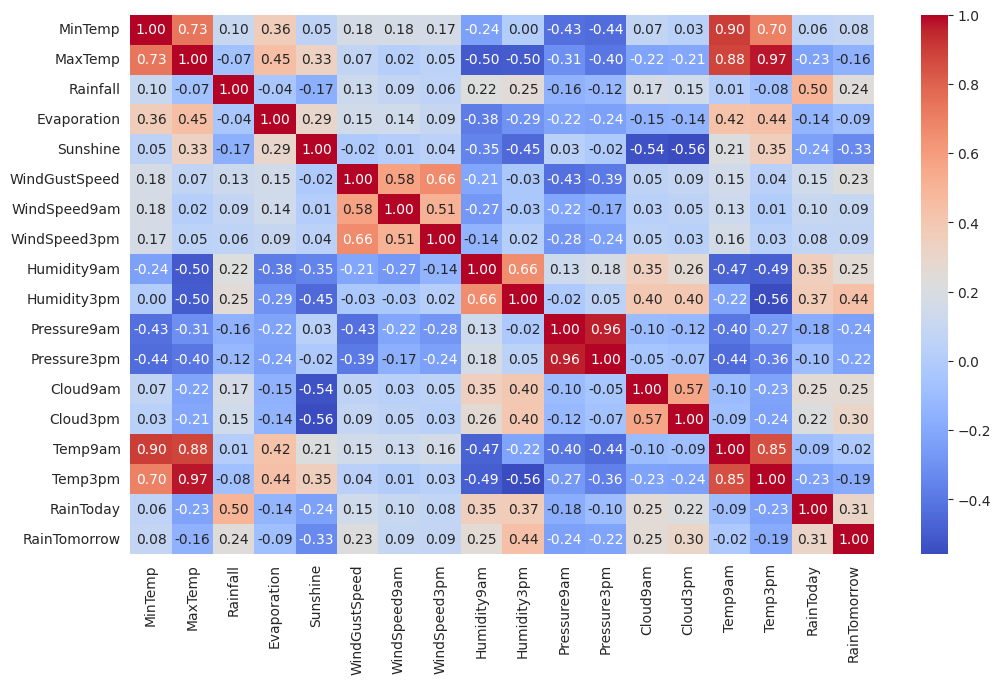

In [34]:
df_num = df_pandas.select_dtypes(include=['float64', 'int32', 'bool']) # Select numerical and boolean columns

cor = df_num.corr() # Compute correlation matrix

plt.figure(figsize=(12, 7))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Changing Categorical Columns to Numerical

In [35]:
column_to_change = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df_pandas_dummies = pd.get_dummies(df_pandas[column_to_change])
df_pandas_dummies.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [36]:
df_pandas_dummies = pd.concat([df_pandas.drop(column_to_change, axis=1), df_pandas_dummies], axis=1)
df_pandas_dummies.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.46132,7.61509,44,20,24,71,22,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,5.46132,7.61509,44,4,22,44,25,...,False,False,False,False,False,False,False,False,False,True
2,17.5,32.3,1.0,5.46132,7.61509,41,7,20,82,33,...,False,True,False,False,False,False,False,False,False,False
3,14.6,29.7,0.2,5.46132,7.61509,56,19,24,55,23,...,False,False,False,False,False,False,False,True,False,False
4,7.7,26.7,0.0,5.46132,7.61509,35,6,17,48,19,...,False,False,False,False,False,False,False,True,False,False


In [37]:
df_pandas_dummies['RainTomorrow'] = df_pandas_dummies.pop('RainTomorrow')
df_pandas_dummies

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainTomorrow
0,13.4,22.9,0.6,5.46132,7.61509,44,20,24,71,22,...,False,False,False,False,False,False,False,True,False,False
1,7.4,25.1,0.0,5.46132,7.61509,44,4,22,44,25,...,False,False,False,False,False,False,False,False,True,False
2,17.5,32.3,1.0,5.46132,7.61509,41,7,20,82,33,...,True,False,False,False,False,False,False,False,False,False
3,14.6,29.7,0.2,5.46132,7.61509,56,19,24,55,23,...,False,False,False,False,False,False,True,False,False,False
4,7.7,26.7,0.0,5.46132,7.61509,35,6,17,48,19,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98532,8.0,20.7,0.0,5.46132,7.61509,41,19,26,56,32,...,False,False,False,False,False,False,False,False,False,False
98533,3.5,21.8,0.0,5.46132,7.61509,31,15,13,59,27,...,False,False,False,False,False,False,False,False,False,False
98534,2.8,23.4,0.0,5.46132,7.61509,31,13,11,51,24,...,False,False,False,False,False,False,False,False,False,False
98535,3.6,25.3,0.0,5.46132,7.61509,22,13,9,56,21,...,False,False,False,False,False,False,False,False,False,False


In [38]:
df_final = spark.createDataFrame(df_pandas_dummies)
df_final.show(5)

+-------+-------+--------+----------------+-----------------+-------------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+-----------------+---------------+---------------+---------------------+----------------------+-----------------+----------------+-----------------+---------------+-----------------+--------------+---------------------+-----------------+---------------+------------------+---------------+------------------+-------------------+------------------+-------------------------+----------------+--------------+---------------------+--------------------+------------------+-------------+------------------+----------------------+------------------+-------------------+----------------+--------------+---------------------+-----------------+-----------------+-------------+-------------------+---------------+----------------------+-------------------+--------------------+--------------+-------------------+-------

### Model Training

For Binary Classification in this Dataset, we will use:
- Logistic Regression
- Random Forest Classifier
- Desicison Tree Classifier
- Gradient-Boosted Tree Classifier

#### Pre-Training

In [62]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier,DecisionTreeClassifier,GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.pipeline import Pipeline
from pyspark.ml import Pipeline

In [40]:
df_final = df_final.withColumn("RainTomorrow", col("RainTomorrow").cast("int")) # Changing Target column from Boolean to Integer for Training

In [41]:
(trainingData, testData) = df_final.randomSplit([0.7, 0.3], seed=42) # Splitting Dataset into Training & Testing Dataframes (70-30)

In [42]:
assembler = VectorAssembler(inputCols=trainingData.columns[:-1], outputCol='features') # Defining Target & Features

In [43]:
evaluator = BinaryClassificationEvaluator(labelCol="RainTomorrow") # Initializing Evaluator

#### Logistic Regression Model

In [44]:
lr = LogisticRegression(featuresCol='features', labelCol='RainTomorrow')

In [45]:
lr_model = Pipeline(stages=[assembler, lr]).fit(trainingData)

In [46]:
lr_preds = lr_model.transform(testData)
lr_score = evaluator.evaluate(lr_preds)
print("Logistic Regression Classifier Accuracy: ", lr_score)

Logistic Regression Classifier Accuracy:  0.872336387740553


#### Random Forest Classifier Model

In [47]:
rf = RandomForestClassifier(numTrees=100, maxDepth=4, labelCol="RainTomorrow", seed=42)

In [48]:
rf_model = Pipeline(stages=[assembler, rf]).fit(trainingData)

In [49]:
rf_preds = rf_model.transform(testData)
rf_score = evaluator.evaluate(rf_preds)
print("Random Forest Classifier accuracy:", rf_score)

Random Forest Classifier accuracy: 0.8326573572274538


#### Decision Tree Classifier Model

In [50]:
dt = DecisionTreeClassifier(labelCol="RainTomorrow", featuresCol="features")

In [51]:
dt_model = Pipeline(stages=[assembler, dt]).fit(trainingData)

In [52]:
dt_preds = dt_model.transform(testData)
dt_score = evaluator.evaluate(dt_preds)
print("Decision Tree Classifier accuracy:", dt_score)

Decision Tree Classifier accuracy: 0.30357653702013576


#### Gradient-Boosted Tree Classifier Model

In [53]:
gbt = GBTClassifier(featuresCol='features', labelCol='RainTomorrow', maxIter=10, maxDepth=3)

In [54]:
gbt_model = Pipeline(stages=[assembler, gbt]).fit(trainingData)

In [55]:
gbt_preds = gbt_model.transform(testData)
gbt_score = evaluator.evaluate(gbt_preds)
print('Gradient-Boosted Tree Classifier Accuracy:', gbt_score)

Gradient-Boosted Tree Classifier Accuracy: 0.8455569788723237


### Model Evaluation & Correlation Matrix

In [56]:
print("Logistic Regression Classifier Accuracy: ", lr_score)
print('Gradient-Boosted Tree Classifier Accuracy:', gbt_score)
print("Random Forest Classifier accuracy:", rf_score)
print("DecisionTree Classifier accuracy:", dt_score)

Logistic Regression Classifier Accuracy:  0.872336387740553
Gradient-Boosted Tree Classifier Accuracy: 0.8455569788723237
Random Forest Classifier accuracy: 0.8326573572274538
DecisionTree Classifier accuracy: 0.30357653702013576


#### Logistic Regression Model

In [57]:
lr_preds = lr_model.transform(testData)
lr_preds = lr_preds.select('RainTomorrow', 'prediction')
lr_preds = lr_preds.rdd.map(lambda x: (float(x[1]), float(x[0])))
lr_preds = spark.createDataFrame(lr_preds, ['prediction', 'label'])

lr_preds.groupby('label', 'prediction').count().show()
print("Logistic Regression Classifier Accuracy: ", lr_score)

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0| 3320|
|  0.0|       1.0| 1296|
|  1.0|       0.0| 3147|
|  0.0|       0.0|21616|
+-----+----------+-----+

Logistic Regression Classifier Accuracy:  0.872336387740553


#### Gradient-Boosted Tree Model

In [58]:
gbt_preds = gbt_model.transform(testData)
gbt_preds = gbt_preds.select('RainTomorrow', 'prediction')
gbt_preds = gbt_preds.rdd.map(lambda x: (float(x[1]), float(x[0])))
gbt_preds = spark.createDataFrame(gbt_preds, ['prediction', 'label'])

gbt_preds.groupby('label', 'prediction').count().show()
print('Gradient-Boosted Tree Classifier Accuracy:', gbt_score)

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0| 2641|
|  0.0|       1.0|  895|
|  1.0|       0.0| 3826|
|  0.0|       0.0|22017|
+-----+----------+-----+

Gradient-Boosted Tree Classifier Accuracy: 0.8455569788723237


#### Random Forest Classifier Model

In [59]:
rf_preds = rf_model.transform(testData)
rf_preds = rf_preds.select('RainTomorrow', 'prediction')
rf_preds = rf_preds.rdd.map(lambda x: (float(x[1]), float(x[0])))
rf_preds = spark.createDataFrame(rf_preds, ['prediction', 'label'])

rf_preds.groupby('label', 'prediction').count().show()
print("Random Forest Classifier accuracy:", rf_score)

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0| 1106|
|  0.0|       1.0|  156|
|  1.0|       0.0| 5361|
|  0.0|       0.0|22756|
+-----+----------+-----+

Random Forest Classifier accuracy: 0.8326573572274538


#### DecisionTree Classifier Model

In [60]:
dt_preds = dt_model.transform(testData)
dt_preds = dt_preds.select('RainTomorrow', 'prediction')
dt_preds = dt_preds.rdd.map(lambda x: (float(x[1]), float(x[0])))
dt_preds = spark.createDataFrame(dt_preds, ['prediction', 'label'])

dt_preds.groupby('label', 'prediction').count().show()
print("DecisionTree Classifier accuracy:", dt_score)

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0| 2684|
|  0.0|       1.0| 1047|
|  1.0|       0.0| 3783|
|  0.0|       0.0|21865|
+-----+----------+-----+

DecisionTree Classifier accuracy: 0.30357653702013576


# Stop Spark Session

In [61]:
spark.stop()